In [80]:
# imported the libraries used in this model
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pickle
%matplotlib inline

In [81]:
#imported the dataset
dataset=pd.read_csv(r"C:\Users\Lenovo\Desktop\Mechademy\weather_data.csv")

In [82]:
#checked the values of dataset
dataset

,datetime_utc,_conds,_dewptm,_fog,_hail,_heatindexm,_hum,_precipm,_pressurem,_rain,_snow,_tempm,_thunder,_tornado,_vism,_wdird,_wdire,_wgustm,_windchillm,_wspdm
0,19961101-11:00,Smoke,9.0,0,0,NaN,27.0,NaN,1010.0,0,0,30.0,0,0,5.0,280.0,West,NaN,NaN,7.4
1,19961101-12:00,Smoke,10.0,0,0,NaN,32.0,NaN,-9999.0,0,0,28.0,0,0,NaN,0.0,North,NaN,NaN,NaN
2,19961101-13:00,Smoke,11.0,0,0,NaN,44.0,NaN,-9999.0,0,0,24.0,0,0,NaN,0.0,North,NaN,NaN,NaN
3,19961101-14:00,Smoke,10.0,0,0,NaN,41.0,NaN,1010.0,0,0,24.0,0,0,2.0,0.0,North,NaN,NaN,NaN
4,19961101-16:00,Smoke,11.0,0,0,NaN,47.0,NaN,1011.0,0,0,23.0,0,0,1.2,0.0,North,NaN,NaN,0.0
5,19961101-17:00,Smoke,12.0,0,0,NaN,56.0,NaN,1011.0,0,0,21.0,0,0,NaN,0.0,North,NaN,NaN,NaN
6,19961101-18:00,Smoke,13.0,0,0,NaN,60.0,NaN,1010.0,0,0,21.0,0,0,0.8,0.0,North,NaN,NaN,0.0
7,19961101-19:00,Smoke,13.0,0,0,NaN,60.0,NaN,-9999.0,0,0,21.0,0,0,NaN,0.0,North,NaN,NaN,NaN
8,19961101-20:00,Smoke,13.0,0,0,NaN,68.0,NaN,-9999.0,0,0,19.0,0,0,NaN,0.0,North,NaN,NaN,NaN
9,19961101-21:00,Smoke,13.0,0,0,NaN,68.0,NaN,1010.0,0,0,19.0,0,0,NaN,0.0,North,NaN,NaN,NaN


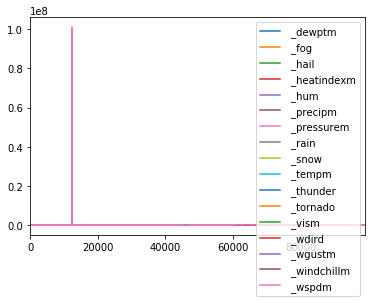

In [83]:
#plotted the dataset
dataset.plot()

In [84]:

x=dataset.iloc[:,[0,11]]#taken the 0 coloumn means the time series and 11 means the temperature series in x
forecasting_dataset=pd.DataFrame(x)#changed the type in dataframe
forecasting_dataset#checked the dataframe

,datetime_utc,_tempm
0,19961101-11:00,30.0
1,19961101-12:00,28.0
2,19961101-13:00,24.0
3,19961101-14:00,24.0
4,19961101-16:00,23.0
5,19961101-17:00,21.0
6,19961101-18:00,21.0
7,19961101-19:00,21.0
8,19961101-20:00,19.0
9,19961101-21:00,19.0


In [85]:
#changed the dataframe to series.series and saved in 'indexed_forecasting' 
forecasting_dataset['datetime_utc']=pd.to_datetime(forecasting_dataset['datetime_utc'],infer_datetime_format=True)
indexed_forecasting=forecasting_dataset.set_index(['datetime_utc'])

In [86]:
from datetime import datetime
indexed_forecasting

,_tempm
datetime_utc,
1996-11-01 11:00:00,30.0
1996-11-01 12:00:00,28.0
1996-11-01 13:00:00,24.0
1996-11-01 14:00:00,24.0
1996-11-01 16:00:00,23.0
1996-11-01 17:00:00,21.0
1996-11-01 18:00:00,21.0
1996-11-01 19:00:00,21.0
1996-11-01 20:00:00,19.0


In [87]:
#the NaN values of null values are filled with the mean of the temperatures
indexed_forecasting=indexed_forecasting.fillna(indexed_forecasting.mean())

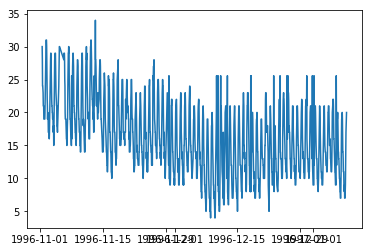

In [88]:
#data is too large so taken approx 2 years dataset to plot and check the graph
plt.plot(indexed_forecasting[0:1440])

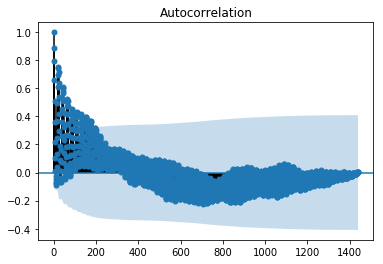

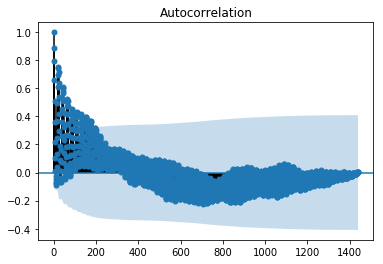

In [89]:
#checked the correlation as to apply time series the dataset must be stationary
from statsmodels.graphics.tsaplots import plot_acf
forecasting_difference=indexed_forecasting[0:1440]
plot_acf(forecasting_difference)

In [90]:
#taken the values as arrays in x
x=forecasting_difference.values

In [91]:
train=x[0:720]#training model values
test=x[720:1440]#testing model values
prediction=[]#takenfor prediction

In [100]:
from statsmodels.tsa.ar_model import AR# imported the AR model stands for AUTO REGRESSIVE (TIME SERIES MODEL)
from sklearn.metrics import mean_squared_error#checking the error
model=AR(train)
modelfit=model.fit()
pickle.dump(modelfit, open(r'C:\Users\Lenovo\Desktop\Mechademy\project_1.pickle', 'wb'))

In [103]:
loaded_model = pickle.load( open(r'C:\Users\Lenovo\Desktop\Mechademy\project_1.pickle', 'rb'))
loaded_model.predict(start=720,end=1440)


array([21.12290196, 22.07674347, 22.12301084, 21.20773684, 20.10104976,
       18.57129046, 17.07305112, 16.041265  , 15.03553307, 14.31905713,
       13.61502708, 12.912059  , 12.41436844, 11.91814578, 11.68349115,
       11.70659873, 12.17559118, 13.18866726, 14.51662317, 16.1701711 ,
       17.78931284, 19.23692825, 20.32310119, 20.8643828 , 20.90414088,
       20.45147779, 19.64375628, 18.64816775, 17.556799  , 16.50989791,
       15.54684165, 14.70976039, 14.01766315, 13.45272437, 13.05538234,
       12.84375276, 12.8737875 , 13.18962015, 13.7928081 , 14.67520169,
       15.75773623, 16.9388619 , 18.09042588, 19.07440106, 19.78966435,
       20.16255988, 20.17530828, 19.85633346, 19.2648642 , 18.48910066,
       17.61485993, 16.7241475 , 15.88271917, 15.1369556 , 14.52522763,
       14.07398618, 13.80859763, 13.75058446, 13.91324989, 14.30030677,
       14.89440327, 15.65702597, 16.52690699, 17.42451156, 18.26389099,
       18.96179984, 19.45154875, 19.6911315 , 19.66743627, 19.39